**1. Customer Analytics & Segmentation**
• Customer Segmentation using RFM Analysis
Segment customers based on Recency, Frequency, Monetary value to find VIPs, dormant users, bargain hunters, etc.
• Churn Prediction
Predict which customers are likely to stop purchasing.
Use classification models (Random Forest, XGBoost).

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data = pd.read_csv('/content/Customer sentiment dataset.csv')
data.head()

,Customer_Name,Product_Id,Order_Id,Purchase_date,price,offered_price,Payment,Customer_Id,Quantity
0,Saranya,5a33481f-3583-4693-b197-c3c29a1aae6d,21f1fb03-97b9-4766-af25-d73aeca739c5,2025-02-27T06:42:03.632068,NaN,NaN,479.0,464b1ce8-fd7f-4107-a585-7817da9e3387,1.0
1,Renugadevi,1791c444-890c-419c-a72d-a2266fee5ca9,f5122618-63da-496f-98ac-8dc339719e49,2025-02-27T06:42:03.632068,NaN,NaN,1158.0,a7caac98-3ae6-4789-8f90-2d9e7ad802cc,1.0
2,Kousalya,9995ee68-eb4c-485f-8927-760e150b3997,8eec82b4-99b3-4682-a2e3-2fc1ab22f292,2025-02-27T06:42:03.632068,700.0,999.0,579.0,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,1.0
3,Amali Reeta Y,e1c0ffb7-5740-4647-88b6-afd79a72f000,37a2afaf-a592-4e00-a5ba-3884809cfd95,2025-02-27T06:42:03.632068,700.0,999.0,479.0,9f3812c4-33ea-4272-b354-5db47cf3318c,1.0
4,Divya,1d8572d4-8689-4609-82da-9a36b5f5d470,6835f3f1-317f-469a-9999-5644b7eb9b6e,2025-02-27T06:42:03.632068,1.0,NaN,4.0,634a378e-a9ba-462c-bc63-acf4ff22006d,1.0


In [220]:
data.dtypes

,0
Customer_Name,object
Product_Id,object
Order_Id,object
Purchase_date,object
price,float64
offered_price,float64
Payment,float64
Customer_Id,object
Quantity,float64


In [221]:
data.describe()

,price,offered_price,Payment,Quantity
count,47.000000,30.000000,2418.000000,3057.000000
mean,355.234043,597.900000,540.815550,1.098790
std,252.647134,321.365122,377.726212,0.555837
min,1.000000,130.000000,0.000000,0.000000
25%,167.000000,349.000000,399.000000,1.000000
50%,270.000000,449.000000,455.000000,1.000000
75%,650.000000,999.000000,599.000000,1.000000
max,780.000000,1200.000000,5200.000000,10.000000


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10697 entries, 0 to 10696
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Name  6729 non-null   object 
 1   Product_Id     139 non-null    object 
 2   Order_Id       3069 non-null   object 
 3   Purchase_date  3057 non-null   object 
 4   price          47 non-null     float64
 5   offered_price  30 non-null     float64
 6   Payment        2418 non-null   float64
 7   Customer_Id    10697 non-null  object 
 8   Quantity       3057 non-null   float64
dtypes: float64(4), object(5)
memory usage: 752.3+ KB


In [223]:
data.isnull().sum()

,0
Customer_Name,3968
Product_Id,10558
Order_Id,7628
Purchase_date,7640
price,10650
offered_price,10667
Payment,8279
Customer_Id,0
Quantity,7640


In [224]:
data.dropna(inplace=True)

In [225]:
import datetime as dt
data['Purchase_date'] = pd.to_datetime(data['Purchase_date'])

In [226]:
#RFM Analysis for Recency
Recency = data.groupby(by='Customer_Id', as_index=False)['Purchase_date'].max()
Recency.columns = ['Customer_Id', 'LastPurchaseDate']
recent_date = Recency['LastPurchaseDate'].max()
Recency['Recency'] = Recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
Recency.head(10)

,Customer_Id,LastPurchaseDate,Recency
0,07257117-434e-4501-ad8c-8102a9599a4b,2025-02-27 06:42:03.632068,0
1,1475966e-44f8-4cdc-88db-9cd821e95552,2025-02-27 06:42:03.632068,0
2,18063c87-ff66-4e9b-93c9-f7179b6a5bb3,2025-02-27 06:42:03.632068,0
3,1ae9d268-e365-4527-b7db-cbf903c60f91,2025-02-27 06:42:03.632068,0
4,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,2025-02-27 06:42:03.632068,0
5,20874b99-22bd-4929-b149-5cc70e1e088d,2025-02-27 06:42:03.632068,0
6,47554662-f301-44cd-946f-4f1d693b7708,2025-02-27 06:42:03.632068,0
7,47af317f-0bac-4b10-b3c2-90ba4e1ea9d1,2025-02-27 06:42:03.632068,0
8,545ae4db-1d15-4009-b21b-5e3cd39fae47,2025-02-27 06:42:03.632068,0
9,54a132ed-f711-4e43-9ede-ed815f08db63,2025-02-27 06:42:03.632068,0


In [227]:
#RFM Analysis for Frequency
frequency = data.groupby(by=['Customer_Id'], as_index=False)['Purchase_date'].count()
frequency.columns = ['Customer_Id', 'Frequency']
frequency.head(10)

,Customer_Id,Frequency
0,07257117-434e-4501-ad8c-8102a9599a4b,1
1,1475966e-44f8-4cdc-88db-9cd821e95552,1
2,18063c87-ff66-4e9b-93c9-f7179b6a5bb3,1
3,1ae9d268-e365-4527-b7db-cbf903c60f91,1
4,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,1
5,20874b99-22bd-4929-b149-5cc70e1e088d,1
6,47554662-f301-44cd-946f-4f1d693b7708,1
7,47af317f-0bac-4b10-b3c2-90ba4e1ea9d1,1
8,545ae4db-1d15-4009-b21b-5e3cd39fae47,1
9,54a132ed-f711-4e43-9ede-ed815f08db63,1


In [228]:
#RFM Analysis for Monetary
data['Total'] = data['Payment']
monetary = data.groupby(by='Customer_Id', as_index=False)['Total'].sum()
monetary.columns = ['Customer_Id', 'Monetary']
monetary.head(10)

,Customer_Id,Monetary
0,07257117-434e-4501-ad8c-8102a9599a4b,6.0
1,1475966e-44f8-4cdc-88db-9cd821e95552,549.0
2,18063c87-ff66-4e9b-93c9-f7179b6a5bb3,3.0
3,1ae9d268-e365-4527-b7db-cbf903c60f91,479.0
4,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,579.0
5,20874b99-22bd-4929-b149-5cc70e1e088d,958.0
6,47554662-f301-44cd-946f-4f1d693b7708,479.0
7,47af317f-0bac-4b10-b3c2-90ba4e1ea9d1,2.0
8,545ae4db-1d15-4009-b21b-5e3cd39fae47,579.0
9,54a132ed-f711-4e43-9ede-ed815f08db63,3.0


In [229]:
#To find the value for Recency,Frequency,Monetary
rfm_data= Recency.merge(frequency, on='Customer_Id').merge(monetary, on='Customer_Id')
rfm_data.head(10)

,Customer_Id,LastPurchaseDate,Recency,Frequency,Monetary
0,07257117-434e-4501-ad8c-8102a9599a4b,2025-02-27 06:42:03.632068,0,1,6.0
1,1475966e-44f8-4cdc-88db-9cd821e95552,2025-02-27 06:42:03.632068,0,1,549.0
2,18063c87-ff66-4e9b-93c9-f7179b6a5bb3,2025-02-27 06:42:03.632068,0,1,3.0
3,1ae9d268-e365-4527-b7db-cbf903c60f91,2025-02-27 06:42:03.632068,0,1,479.0
4,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,2025-02-27 06:42:03.632068,0,1,579.0
5,20874b99-22bd-4929-b149-5cc70e1e088d,2025-02-27 06:42:03.632068,0,1,958.0
6,47554662-f301-44cd-946f-4f1d693b7708,2025-02-27 06:42:03.632068,0,1,479.0
7,47af317f-0bac-4b10-b3c2-90ba4e1ea9d1,2025-02-27 06:42:03.632068,0,1,2.0
8,545ae4db-1d15-4009-b21b-5e3cd39fae47,2025-02-27 06:42:03.632068,0,1,579.0
9,54a132ed-f711-4e43-9ede-ed815f08db63,2025-02-27 06:42:03.632068,0,1,3.0


In [230]:
#Using the RFM analyse values to find the customer Segmentation
def rfm_segmentation(seg):
    if seg['Monetary'] >= 1500:
        return 'VIP Customers'
    elif seg['Monetary'] > 1000 :
        return 'High Customers'
    elif seg['Monetary'] > 500:
        return 'Mid Spenders'
    elif seg['Monetary'] > 300:
        return 'Low Spenders'
    else:
        return 'Dormant user'

rfm_data['Customer_Segment'] = rfm_data.apply(rfm_segmentation, axis=1)
rfm_data.head(20)

,Customer_Id,LastPurchaseDate,Recency,Frequency,Monetary,Customer_Segment
0,07257117-434e-4501-ad8c-8102a9599a4b,2025-02-27 06:42:03.632068,0,1,6.0,Dormant user
1,1475966e-44f8-4cdc-88db-9cd821e95552,2025-02-27 06:42:03.632068,0,1,549.0,Mid Spenders
2,18063c87-ff66-4e9b-93c9-f7179b6a5bb3,2025-02-27 06:42:03.632068,0,1,3.0,Dormant user
3,1ae9d268-e365-4527-b7db-cbf903c60f91,2025-02-27 06:42:03.632068,0,1,479.0,Low Spenders
4,1eb63f22-be2f-4586-9539-0e4d6ed83b8f,2025-02-27 06:42:03.632068,0,1,579.0,Mid Spenders
5,20874b99-22bd-4929-b149-5cc70e1e088d,2025-02-27 06:42:03.632068,0,1,958.0,Mid Spenders
6,47554662-f301-44cd-946f-4f1d693b7708,2025-02-27 06:42:03.632068,0,1,479.0,Low Spenders
7,47af317f-0bac-4b10-b3c2-90ba4e1ea9d1,2025-02-27 06:42:03.632068,0,1,2.0,Dormant user
8,545ae4db-1d15-4009-b21b-5e3cd39fae47,2025-02-27 06:42:03.632068,0,1,579.0,Mid Spenders
9,54a132ed-f711-4e43-9ede-ed815f08db63,2025-02-27 06:42:03.632068,0,1,3.0,Dormant user


In [231]:
segment_counts = rfm_data['Customer_Segment'].value_counts()
segment_counts

,count
Customer_Segment,
Mid Spenders,11
Dormant user,9
Low Spenders,8
High Customers,1


In [232]:
# Churn Prediction
#Predict which customers are likely to stop purchasing. Use classification models (Random Forest, XGBoost).
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,confusion_matrix

In [233]:
x = rfm_data[['Recency', 'Frequency', 'Monetary']]
y = rfm_data['Customer_Segment']

In [234]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [235]:
y_encoded = le.fit_transform(y)

In [236]:
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [237]:
#using Random Forest
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train_encoded)

RandomForestClassifier(n_estimators=20)

In [238]:
model.score(x_test,y_test_encoded)

1.0

In [239]:
y_predicted_encoded = model.predict(x_test)

In [240]:
y_predicted = le.inverse_transform(y_predicted_encoded)
y_predicted

array(['Dormant user', 'Low Spenders', 'Mid Spenders', 'Mid Spenders',
       'Mid Spenders', 'Dormant user'], dtype=object)

In [241]:
accuracy = accuracy_score(y_test_encoded, y_predicted_encoded) # Use encoded for accuracy as it's based on exact matches
class_report = classification_report(y_test, y_predicted) # Use original y_test and inverse transformed y_predicted
precision = precision_score(y_test_encoded, y_predicted_encoded,average='weighted') # Use encoded for precision
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print("Classification Report:\n", class_report)

Accuracy: 1.0
Precision: 1.0
Classification Report:
                 precision    recall  f1-score   support

  Dormant user       0.50      1.00      0.67         1
High Customers       0.00      0.00      0.00         1
  Low Spenders       0.00      0.00      0.00         2
  Mid Spenders       0.67      1.00      0.80         2

      accuracy                           0.50         6
     macro avg       0.29      0.50      0.37         6
  weighted avg       0.31      0.50      0.38         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


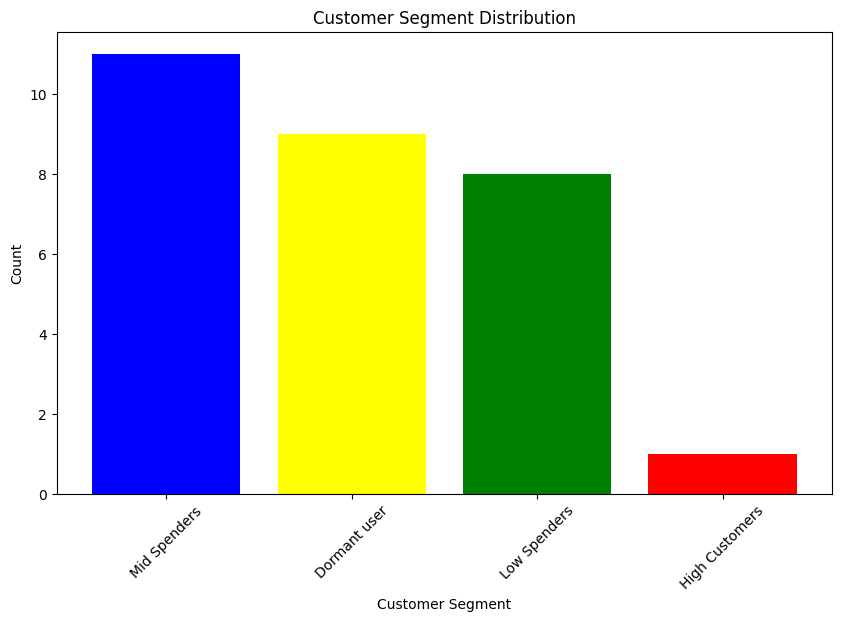

In [242]:
colors = ['blue','yellow','green','red','skyblue']
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values, color=colors)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()

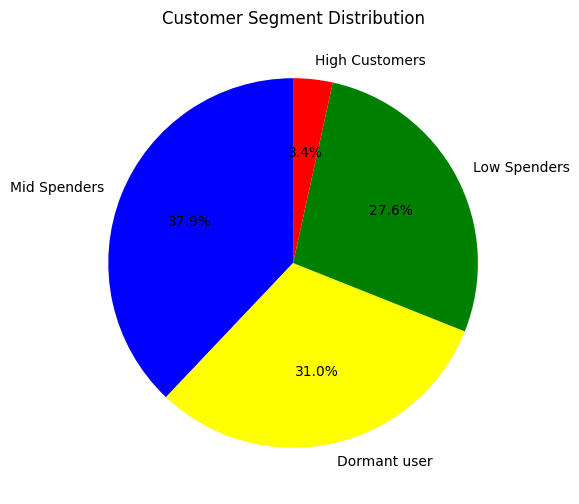

In [243]:
plt.figure(figsize=(8, 6))
colors = ['blue','yellow','green','red','skyblue']
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Customer Segment Distribution')
plt.show()

In [256]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [257]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


In [259]:
model=XGBClassifier()
model.fit(x_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [260]:
model_pred_encoded = model.predict(x_test)

In [261]:
model_pred = le.inverse_transform(model_pred_encoded)

In [262]:
accuracy = accuracy_score(y_test_encoded, model_pred_encoded)
class_report = classification_report(y_test, model_pred)
precision = precision_score(y_test_encoded, model_pred_encoded,average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print("Classification Report:\n", class_report)

Accuracy: 1.0
Precision: 1.0
Classification Report:
                 precision    recall  f1-score   support

  Dormant user       0.50      1.00      0.67         1
High Customers       0.00      0.00      0.00         1
  Low Spenders       0.00      0.00      0.00         2
  Mid Spenders       0.67      1.00      0.80         2

      accuracy                           0.50         6
     macro avg       0.29      0.50      0.37         6
  weighted avg       0.31      0.50      0.38         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


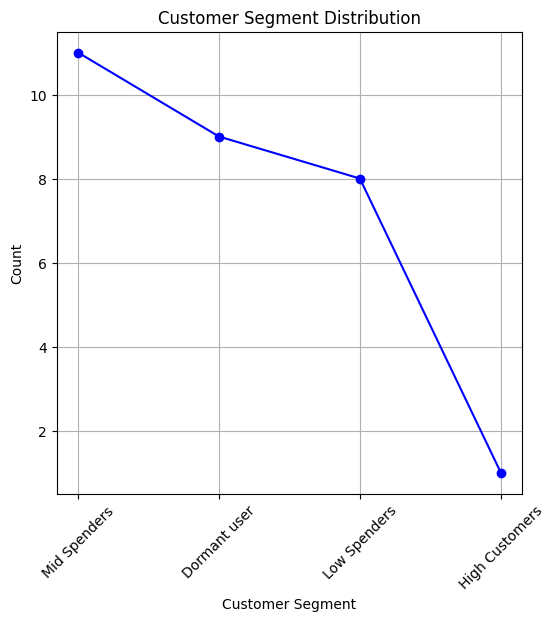

In [266]:
plt.figure(figsize=(6, 6))
plt.plot(segment_counts.index, segment_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()